# E23CSEU0055 - Arihant Gupta - EB02 - Lab_03 - Time Series Analysis

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<h2>Task 1</h2>

C:\Users\ariha\AppData\Local\Temp\ipykernel_17468\1576000814.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  mon_df = df['PM2.5'].resample('M').mean()


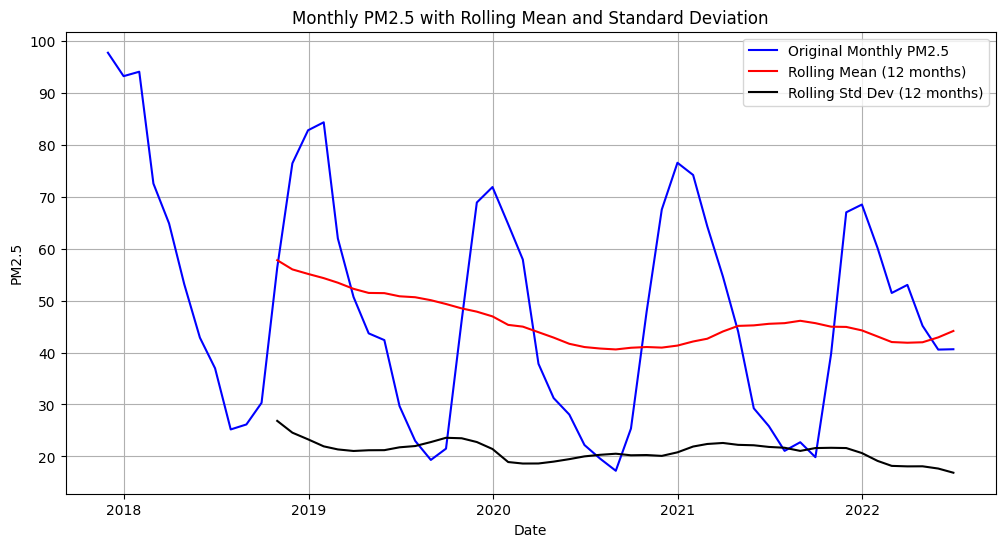

ADF Test:
(-2.2675597099670384, 0.1826441088237883, 10, 45, {'1%': -3.584828853223594, '5%': -2.9282991495198907, '10%': -2.6023438271604937}, 286.87056811793815)

KPSS Test:
(0.20261275412670404, 0.1, 4, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


C:\Users\ariha\AppData\Local\Temp\ipykernel_17468\1576000814.py:33: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(mon_df.dropna(), regression='c', nlags="auto")


In [12]:
df = pd.read_csv('air-quality-india.csv')

df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

mon_df = df['PM2.5'].resample('M').mean()

roll_mean = mon_df.rolling(window=12).mean()
roll_std = mon_df.rolling(window=12).std()


plt.figure(figsize=(12, 6))
plt.plot(mon_df, color='blue', label='Original Monthly PM2.5')
plt.plot(roll_mean, color='red', label='Rolling Mean (12 months)')
plt.plot(roll_std, color='black', label='Rolling Std Dev (12 months)')
plt.legend(loc='best')
plt.title('Monthly PM2.5 with Rolling Mean and Standard Deviation')
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.grid(True)
plt.show()
plt.close()


print("ADF Test:")
adf_test = adfuller(mon_df.dropna(), autolag='AIC')
# Test stat, p-val, Lag, Cric vals
print(adf_test)

print()

print("KPSS Test:")
kpss_test = kpss(mon_df.dropna(), regression='c', nlags="auto")
print(kpss_test)

<h2>Task 2</h2>

C:\Users\ariha\AppData\Local\Temp\ipykernel_17468\3288173782.py:32: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_series = df['PM2.5'].resample('M').mean()


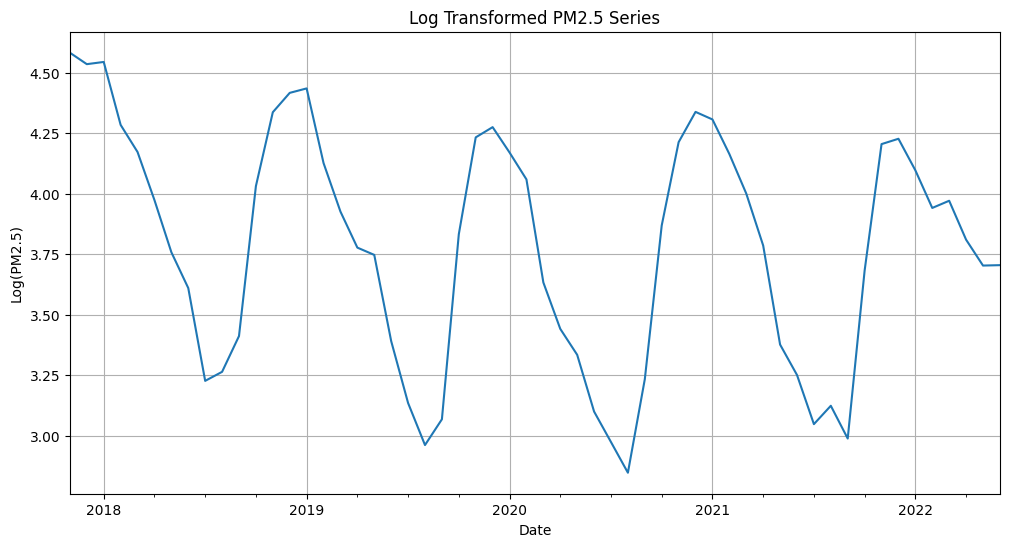

C:\Users\ariha\AppData\Local\Temp\ipykernel_17468\3288173782.py:17: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(timeseries_clean, regression='c', nlags="auto")


--- Stationarity Tests for Log Transformed Series ---

(ADF) Test:
Test Statistic                 -1.743466
p-value                         0.408868
#Lags Used                     10.000000
Number of Observations Used    45.000000
Critical Value (1%)            -3.584829
Critical Value (5%)            -2.928299
Critical Value (10%)           -2.602344
dtype: float64
Result: Fail to reject the null hypothesis. The series is likely non-stationary.

(KPSS) Test:
Test Statistic           0.155908
p-value                  0.100000
Lags Used                4.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64
Result: Fail to reject the null hypothesis. The series is likely stationary.




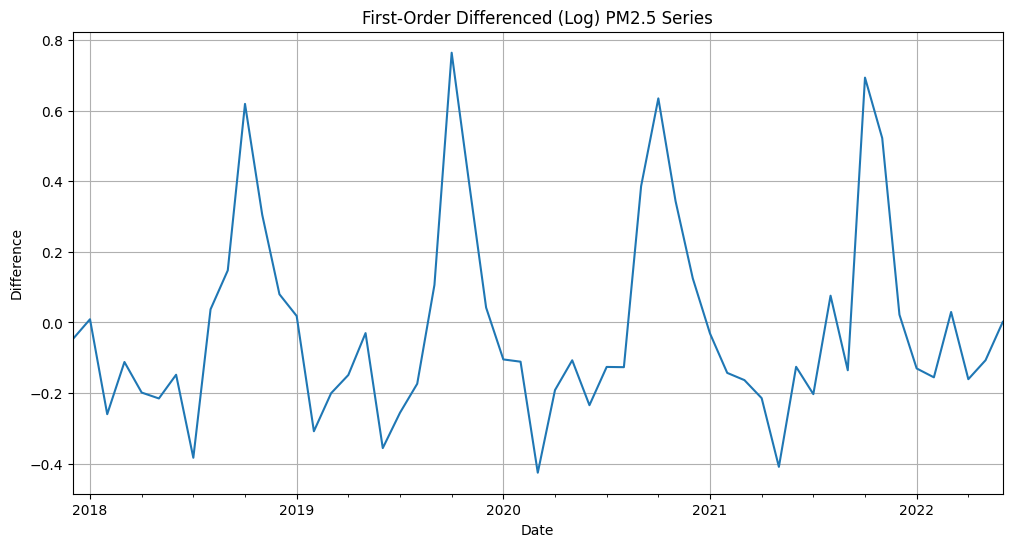

--- Stationarity Tests for First-Order Differenced Series ---

(ADF) Test:
Test Statistic                 -1.980794
p-value                         0.295057
#Lags Used                     11.000000
Number of Observations Used    43.000000
Critical Value (1%)            -3.592504
Critical Value (5%)            -2.931550
Critical Value (10%)           -2.604066
dtype: float64
Result: Fail to reject the null hypothesis. The series is likely non-stationary.

(KPSS) Test:
Test Statistic           0.04824
p-value                  0.10000
Lags Used                3.00000
Critical Value (10%)     0.34700
Critical Value (5%)      0.46300
Critical Value (2.5%)    0.57400
Critical Value (1%)      0.73900
dtype: float64
Result: Fail to reject the null hypothesis. The series is likely stationary.




C:\Users\ariha\AppData\Local\Temp\ipykernel_17468\3288173782.py:17: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(timeseries_clean, regression='c', nlags="auto")


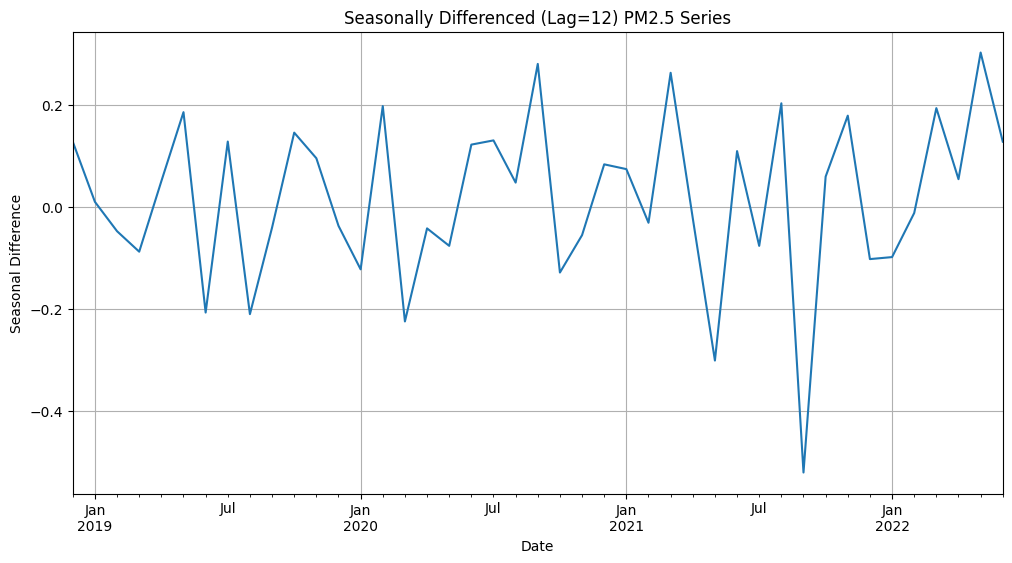

--- Stationarity Tests for Seasonally Differenced Series ---

(ADF) Test:
Test Statistic                -8.045311e+00
p-value                        1.801180e-12
#Lags Used                     0.000000e+00
Number of Observations Used    4.200000e+01
Critical Value (1%)           -3.596636e+00
Critical Value (5%)           -2.933297e+00
Critical Value (10%)          -2.604991e+00
dtype: float64
Result: Reject the null hypothesis. The series is likely stationary.

(KPSS) Test:
Test Statistic           0.105917
p-value                  0.100000
Lags Used                4.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64
Result: Fail to reject the null hypothesis. The series is likely stationary.




C:\Users\ariha\AppData\Local\Temp\ipykernel_17468\3288173782.py:17: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(timeseries_clean, regression='c', nlags="auto")


In [13]:
def stationarity_tests(timeseries, series_name=""):
    print(f"--- Stationarity Tests for {series_name} ---")
    timeseries_clean = timeseries.dropna()

    print("\n(ADF) Test:")
    adf_test = adfuller(timeseries_clean, autolag='AIC')
    adf_output = pd.Series(adf_test[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in adf_test[4].items():
        adf_output['Critical Value (%s)' % key] = value
    print(adf_output)
    if adf_test[1] <= 0.05:
        print("Result: Reject the null hypothesis. The series is likely stationary.")
    else:
        print("Result: Fail to reject the null hypothesis. The series is likely non-stationary.")

    print("\n(KPSS) Test:")
    kpss_test = kpss(timeseries_clean, regression='c', nlags="auto")
    kpss_output = pd.Series(kpss_test[0:3], index=['Test Statistic', 'p-value', 'Lags Used'])
    for key, value in kpss_test[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print(kpss_output)
    if kpss_test[1] < 0.05:
        print("Result: Reject the null hypothesis. The series is likely non-stationary.")
    else:
        print("Result: Fail to reject the null hypothesis. The series is likely stationary.")
    print("\n" + "="*50 + "\n")


df = pd.read_csv('air-quality-india.csv')
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)
monthly_series = df['PM2.5'].resample('M').mean()

if (monthly_series > 0).all():
    log_series = np.log(monthly_series)

    plt.figure(figsize=(12, 6))
    log_series.plot()
    plt.title('Log Transformed PM2.5 Series')
    plt.xlabel('Date')
    plt.ylabel('Log(PM2.5)')
    plt.grid(True)
    plt.show()
    plt.close()

    stationarity_tests(log_series, "Log Transformed Series")

else:
    print("Cannot apply log transform as there are zero or negative values.")
    log_series = monthly_series

diff_series = log_series.diff().dropna()


plt.figure(figsize=(12, 6))
diff_series.plot()
plt.title('First-Order Differenced (Log) PM2.5 Series')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.grid(True)
plt.show()
plt.close()

stationarity_tests(diff_series, "First-Order Differenced Series")


seasonal_diff_series = diff_series.diff(12).dropna()

plt.figure(figsize=(12, 6))
seasonal_diff_series.plot()
plt.title('Seasonally Differenced (Lag=12) PM2.5 Series')
plt.xlabel('Date')
plt.ylabel('Seasonal Difference')
plt.grid(True)
plt.show()
plt.close()

stationarity_tests(seasonal_diff_series, "Seasonally Differenced Series")

<h2>Task 3</h2>

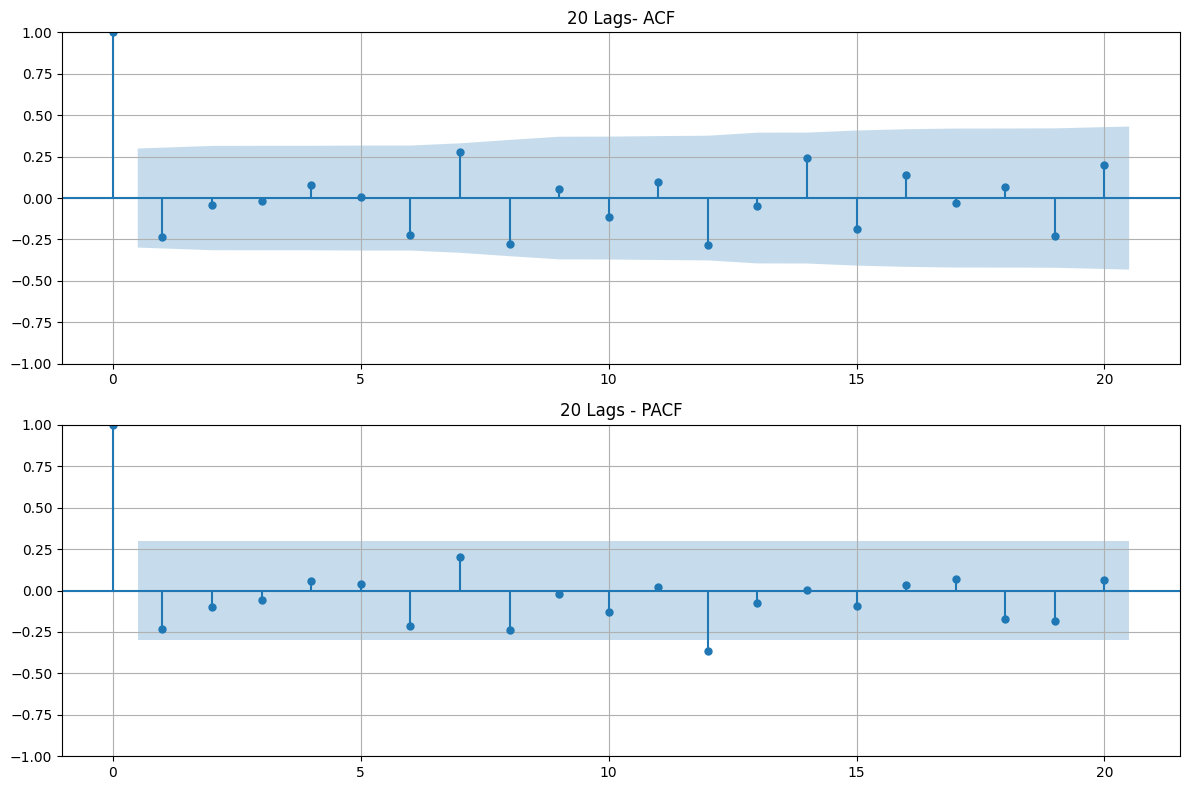

In [17]:
max_lags = 20
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

plot_acf(seasonal_diff_series, lags=max_lags, ax=axes[0])
axes[0].set_title("20 Lags- ACF")
axes[0].grid(True)

plot_pacf(seasonal_diff_series, lags=max_lags, ax=axes[1])
axes[1].set_title("20 Lags - PACF")
axes[1].grid(True)

plt.tight_layout()
plt.show()
plt.close()
